# The simulation of the perceptron convergence theorem 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn
plt.style.use("seaborn")
%matplotlib inline  
 
random.seed(1)       # 乱数固定

def recog_function(x, w):
        X = np.hstack([1.0, x])    # 行方向への結合
        return np.dot(X, w)   # 内積を取る   


def perseptron_theorem(w, rho, n):    # nは繰り返し回数．x, wは array配列を仮定．
        class_1 = np.array([1.2, 0.2, -0.2])
        class_2 = np.array([-0.5, -1.0, -1.5])
        X = np.hstack([class_1, class_2])   # ベクトルの結合
        x_path = np.zeros(n+1)   # 初期化
        y_path = np.zeros(n+1)   # 初期化
        x_path[0] = w[0]   # 初期値
        y_path[0] = w[1]   # 初期値
        
        for i in range(n):
                z = np.random.choice(X, size = 1)   # 無作為抽出
                u = np.hstack([1.0, z])
                if (z in class_1) and (recog_function(z, w) < 0):    # recog_function < 0が学習データをclass2と判別した事を表す
                        w += rho * u
                        x_path[i+1], y_path[i+1] = w[0], w[1]
                        
                elif (z in class_2) and (recog_function(z, w) > 0):
                        w -= rho * u
                        x_path[i+1], y_path[i+1] = w[0], w[1]
                        
                else:
                    w = w
                    x_path[i+1], y_path[i+1] = w[0], w[1]
                    
                    
        return x_path, y_path  


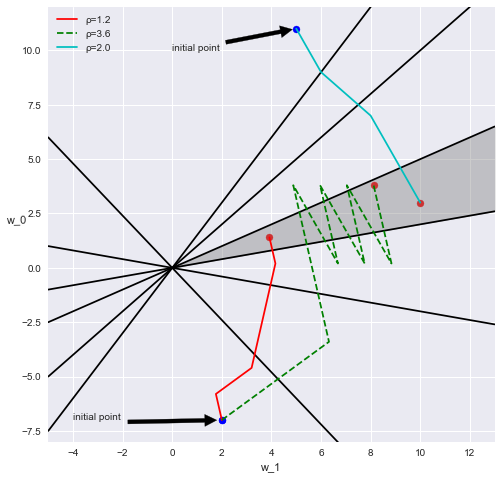

In [2]:
w = np.array([-7.0, 2.0])
x_path, y_path = perseptron_theorem(w, rho=1.2, n = 100)

w = np.array([-7.0, 2.0])
x_path_2, y_path_2 = perseptron_theorem(w, rho = 3.6, n=100)

w = np.array([11.0, 5.0])
x_path_3, y_path_3 = perseptron_theorem(w, rho = 2.0, n = 100)

x = np.linspace(-5, 13, num = 100)
x_1 = np.linspace(0, 13, num = 100)
plt.figure(figsize=(8,8))
plt.ylim(-8, 12)
plt.xlim(-5, 13)
plt.plot(x, -1.2 * x, 'k-')
plt.plot(x, -0.2 * x, 'k-')
plt.plot(x, 0.2*x , 'k-')
plt.plot(x, 0.5 * x, 'k-')
plt.plot(x, 1.0 * x, 'k-')
plt.plot(x, 1.5 * x, 'k-')

plt.scatter(y_path[99], x_path[99], color = 'r', marker = 'o')
plt.scatter(y_path[0], x_path[0], color = 'b', marker = 'o')
plt.plot(y_path, x_path, 'r-', label = 'ρ=1.2')
plt.annotate('initial point', xy=(2, -7), xytext=(-4, -7),arrowprops=dict(facecolor='black', shrink=0.05))

plt.scatter(y_path_2[0], x_path_2[0], color = 'b', marker = 'o')
plt.scatter(y_path_2[99], x_path_2[99], color = 'r', marker = 'o')
plt.plot(y_path_2, x_path_2, 'g--', label = 'ρ=3.6')

plt.scatter(y_path_3[0], x_path_3[0], color = 'b', marker = 'o')
plt.scatter(y_path_3[99], x_path_3[99], color = 'r', marker = 'o')
plt.plot(y_path_3, x_path_3, 'c', label = 'ρ=2.0')
plt.annotate('initial point', xy=(y_path_3[0], x_path_3[0]), xytext=(0, 10), arrowprops=dict(facecolor='black', shrink=0.05))

plt.ylabel('w_0', rotation=True)
plt.xlabel("w_1")
plt.legend(fontsize = 10)
plt.fill_between(x_1, 0.2*x_1, 0.5*x_1, color = 'gray', alpha = 0.4)    # 解領域の塗りつぶし
plt.show()